In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
#from sklearn.metrics import auc
from sklearn import metrics
import seaborn as sns

In [2]:
targets = [2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8]
targets = [10**x for x in targets]
evals = [1, 223, 445, 668, 890, 1112, 1334, 1557, 1779, 2001, 2223, 2445, 2668, 2890,
         3112, 3334, 3557, 3779, 4001, 4223, 4445, 4668, 4890, 5001]
functions = list(np.arange(25, 44))

In [3]:
df1 = pd.read_csv('filepath/tune_final1.csv', index_col=[0])    #aucs csv based on experiments
df2 = pd.read_csv('filepath/tune_final2.csv', index_col=[0])  
df3 = pd.read_csv('filepath/tune_final2.csv', index_col=[0])  #default

In [5]:
df1.head()

,"(DCMA_16_3.4778_T, PSO_50_id)","(DCMA_18_4.7983_F, PSO_40_ga)","(DCMA_15_1.5662_T, PSO_34_ar)","(DCMA_29_3.486_T, PSO_49_id)","(DCMA_28_3.4958_T, PSO_31_id)","(DCMA_30_3.2658_T, PSO_49_id)","(DCMA_14_1.7049_T, PSO_30_id)","(DCMA_30_1.9816_F, PSO_31_id)","(DCMA_20_1.1169_F, PSO_32_id)","(DCMA_5_3.1159_F, PSO_33_id)","(DCMA_5_3.7158_F, PSO_36_id)","(DCMA_5_3.2513_T, PSO_32_id)","(DCMA_10_1.9528_F, PSO_33_id)","(DCMA_24_3.8499_F, PSO_30_id)","(DCMA_19_4.3254_T, PSO_39_ar)","(DCMA_24_1.1049_F, PSO_34_id)","(DCMA_21_4.4569_F, PSO_30_id)","(DCMA_29_2.0299_T, PSO_30_id)"
hm,3131.336364,3931.327273,3064.663636,4024.300000,3804.054545,4062.645455,2987.909091,4048.545455,3757.609091,2434.381818,2105.081818,2409.118182,3123.263636,3674.800000,3464.663636,4103.054545,3442.454545,3331.345455
rastrigin,812.118182,838.381818,834.345455,907.054545,797.990909,787.872727,818.181818,872.727273,812.127273,789.909091,868.700000,828.290909,880.809091,854.554545,1076.763636,860.609091,826.263636,816.163636
griewank,4547.527273,4513.190909,4579.854545,4393.963636,4418.236364,4393.963636,4571.763636,4385.890909,4507.136364,4717.281818,4729.409091,4705.145455,4614.181818,4488.945455,4482.881818,4438.436364,4482.881818,4434.381818
rosenbrock,864.681818,860.636364,864.681818,856.590909,844.454545,848.500000,868.727273,856.590909,868.727273,876.800000,880.836364,880.836364,864.681818,856.590909,860.636364,848.500000,856.590909,852.545455
ackley,3894.972727,3858.609091,3935.363636,3531.327273,3596.009091,3539.418182,4004.072727,3523.272727,3769.700000,3971.772727,3499.009091,4416.227273,4117.181818,3692.963636,3806.072727,3684.872727,3757.590909,3535.400000


In [6]:
df2.head()

,"(DCMA_12_1.9121_T, PSO_37_id)","(DCMA_19_4.402_T, PSO_42_id)","(DCMA_16_2.6862_T, PSO_32_id)","(DCMA_12_3.3726_T, PSO_30_id)","(DCMA_28_3.4958_T, PSO_31_id)","(DCMA_5_2.5372_F, PSO_30_id)","(DCMA_5_3.8272_F, PSO_37_ar)","(DCMA_14_1.7129_F, PSO_35_ar)","(DCMA_5_1.5128_F, PSO_30_id)","(DCMA_12_1.0583_F, PSO_32_id)","(DCMA_13_2.7954_T, PSO_32_id)","(DCMA_13_2.6896_T, PSO_31_id)","(DCMA_27_2.512_T, PSO_34_id)","(DCMA_21_2.9533_F, PSO_32_id)","(DCMA_5_4.3751_T, PSO_30_ar)","(DCMA_7_4.0938_F, PSO_31_ga)"
hm,3589.927273,3785.863636,3456.581818,3099.045455,4048.500000,1828.309091,2188.909091,3466.700000,2183.872727,2719.209091,4313.136364,2718.218182,4109.136364,3880.818182,2230.336364,2082.854545
rastrigin,793.945455,844.445455,1039.381818,856.563636,896.972727,795.963636,802.027273,820.200000,787.881818,1129.300000,818.181818,818.190909,808.081818,864.654545,854.554545,812.127273
griewank,4579.845455,4511.190909,4523.281818,4563.681818,4381.854545,4725.354545,4725.363636,4571.763636,4741.536364,4579.845455,4591.963636,4575.800000,4422.281818,4499.036364,4725.363636,4644.490909
rosenbrock,868.727273,856.590909,868.727273,864.681818,852.545455,880.836364,925.281818,868.727273,880.836364,864.681818,868.727273,868.727273,856.590909,864.681818,868.718182,998.009091
ackley,4020.245455,3818.190909,3890.945455,4020.236364,3604.081818,4428.345455,3975.809091,3939.436364,3640.436364,4052.545455,3991.963636,4008.118182,3612.163636,3789.900000,3595.990909,4173.745455


In [7]:
#map fn name to fn id
def map_fn(name):
    dict_names = { 'hm':25,
              'rastrigin':26,
               'griewank':27,
              'rosenbrock':28,
                  'ackley':29,
                 'lunacek':30,
     'deceptivemultimodal':31,
          'bucherastrigin':32,
               'multipeak':33,
                  'sphere':34,
                  'doublelinearslope':35,
                  'cigar':36,
                  'altcigar':37,
              'ellipsoid':38,
                 'altellipsoid':39,
                 'discus':40,
                 'bentcigar':41,
                 'deceptiveillcond':42,
                 'deceptivepath':43}
    return dict_names[name]    

In [12]:
#df1 = df1.drop(columns=['(DCMA_28_3.4958_T, PSO_31_id)'])

In [16]:
df_tune = df1.join(df2).join(df3)

In [17]:
df_tune = df_tune.reset_index()
for i in range(19):
    name = df_tune.at[i, 'index']
    df_tune.at[i, 'index'] = map_fn(name)   #change name to fid
df_tune = df_tune.set_index(['index'])

In [2]:
#df_tune.head()

In [23]:
df_tune.head()

,"(DCMA_16_3.4778_T, PSO_50_id)","(DCMA_18_4.7983_F, PSO_40_ga)","(DCMA_15_1.5662_T, PSO_34_ar)","(DCMA_29_3.486_T, PSO_49_id)","(DCMA_30_3.2658_T, PSO_49_id)","(DCMA_14_1.7049_T, PSO_30_id)","(DCMA_30_1.9816_F, PSO_31_id)","(DCMA_20_1.1169_F, PSO_32_id)","(DCMA_5_3.1159_F, PSO_33_id)","(DCMA_5_3.7158_F, PSO_36_id)",...,"(DCMA_14_1.7129_F, PSO_35_ar)","(DCMA_5_1.5128_F, PSO_30_id)","(DCMA_12_1.0583_F, PSO_32_id)","(DCMA_13_2.7954_T, PSO_32_id)","(DCMA_13_2.6896_T, PSO_31_id)","(DCMA_27_2.512_T, PSO_34_id)","(DCMA_21_2.9533_F, PSO_32_id)","(DCMA_5_4.3751_T, PSO_30_ar)","(DCMA_7_4.0938_F, PSO_31_ga)","(DiagonalCMA, PSO)"
index,,,,,,,,,,,,,,,,,,,,,
25,3131.336364,3931.327273,3064.663636,4024.300000,4062.645455,2987.909091,4048.545455,3757.609091,2434.381818,2105.081818,...,3466.700000,2183.872727,2719.209091,4313.136364,2718.218182,4109.136364,3880.818182,2230.336364,2082.854545,2191.954545
26,812.118182,838.381818,834.345455,907.054545,787.872727,818.181818,872.727273,812.127273,789.909091,868.700000,...,820.200000,787.881818,1129.300000,818.181818,818.190909,808.081818,864.654545,854.554545,812.127273,696.981818
27,4547.527273,4513.190909,4579.854545,4393.963636,4393.963636,4571.763636,4385.890909,4507.136364,4717.281818,4729.409091,...,4571.763636,4741.536364,4579.845455,4591.963636,4575.800000,4422.281818,4499.036364,4725.363636,4644.490909,4608.100000
28,864.681818,860.636364,864.681818,856.590909,848.500000,868.727273,856.590909,868.727273,876.800000,880.836364,...,868.727273,880.836364,864.681818,868.727273,868.727273,856.590909,864.681818,868.718182,998.009091,856.590909
29,3894.972727,3858.609091,3935.363636,3531.327273,3539.418182,4004.072727,3523.272727,3769.700000,3971.772727,3499.009091,...,3939.436364,3640.436364,4052.545455,3991.963636,4008.118182,3612.163636,3789.900000,3595.990909,4173.745455,4096.927273


In [24]:
df_tune.to_csv(r'filepath/tune_all.csv')

In [25]:
df_tune.columns

Index(['(DCMA_16_3.4778_T, PSO_50_id)', '(DCMA_18_4.7983_F, PSO_40_ga)',
       '(DCMA_15_1.5662_T, PSO_34_ar)', '(DCMA_29_3.486_T, PSO_49_id)',
       '(DCMA_30_3.2658_T, PSO_49_id)', '(DCMA_14_1.7049_T, PSO_30_id)',
       '(DCMA_30_1.9816_F, PSO_31_id)', '(DCMA_20_1.1169_F, PSO_32_id)',
       '(DCMA_5_3.1159_F, PSO_33_id)', '(DCMA_5_3.7158_F, PSO_36_id)',
       '(DCMA_5_3.2513_T, PSO_32_id)', '(DCMA_10_1.9528_F, PSO_33_id)',
       '(DCMA_24_3.8499_F, PSO_30_id)', '(DCMA_19_4.3254_T, PSO_39_ar)',
       '(DCMA_24_1.1049_F, PSO_34_id)', '(DCMA_21_4.4569_F, PSO_30_id)',
       '(DCMA_29_2.0299_T, PSO_30_id)', '(DCMA_12_1.9121_T, PSO_37_id)',
       '(DCMA_19_4.402_T, PSO_42_id)', '(DCMA_16_2.6862_T, PSO_32_id)',
       '(DCMA_12_3.3726_T, PSO_30_id)', '(DCMA_28_3.4958_T, PSO_31_id)',
       '(DCMA_5_2.5372_F, PSO_30_id)', '(DCMA_5_3.8272_F, PSO_37_ar)',
       '(DCMA_14_1.7129_F, PSO_35_ar)', '(DCMA_5_1.5128_F, PSO_30_id)',
       '(DCMA_12_1.0583_F, PSO_32_id)', '(DCMA_13_2.7954_T,

In [31]:
#configs = {f_id: [elite_config_list, auc_list]}

configs = {34: [['(DCMA_5_2.5372_F, PSO_30_id)','(DCMA_29_2.0299_T, PSO_30_id)','(DCMA_21_4.4569_F, PSO_30_id)'],[]],
 36: [['(DCMA_5_1.5128_F, PSO_30_id)', '(DCMA_12_1.0583_F, PSO_32_id)','(DCMA_13_2.7954_T, PSO_32_id)'],[]],
 25: [['(DCMA_16_3.4778_T, PSO_50_id)', '(DCMA_15_1.5662_T, PSO_34_ar)', '(DCMA_18_4.7983_F, PSO_40_ga)'],[]],
 29: [['(DCMA_10_1.9528_F, PSO_33_id)','(DCMA_30_1.9816_F, PSO_31_id)', '(DCMA_24_3.8499_F, PSO_30_id)'],[]],
 26: [['(DCMA_29_3.486_T, PSO_49_id)', '(DCMA_28_3.4958_T, PSO_31_id)', '(DCMA_30_3.2658_T, PSO_49_id)'],[]],
 27: [['(DCMA_14_1.7049_T, PSO_30_id)','(DCMA_30_1.9816_F, PSO_31_id)', '(DCMA_20_1.1169_F, PSO_32_id)'],[]],
 28: [['(DCMA_5_3.1159_F, PSO_33_id)', '(DCMA_5_3.2513_T, PSO_32_id)', '(DCMA_5_3.7158_F, PSO_36_id)'],[]],
 30: [['(DCMA_19_4.3254_T, PSO_39_ar)', '(DCMA_24_1.1049_F, PSO_34_id)'],[]],
 31: [['(DCMA_21_4.4569_F, PSO_30_id)', '(DCMA_29_2.0299_T, PSO_30_id)'],[]],
 32: [['(DCMA_12_1.9121_T, PSO_37_id)', '(DCMA_19_4.402_T, PSO_42_id)'],[]],
 33: [['(DCMA_16_2.6862_T, PSO_32_id)', '(DCMA_12_3.3726_T, PSO_30_id)', '(DCMA_28_3.4958_T, PSO_31_id)'],[]],
 38: [['(DCMA_13_2.6896_T, PSO_31_id)', '(DCMA_27_2.512_T, PSO_34_id)'],[]],
 35: [['(DCMA_14_1.7129_F, PSO_35_ar)', '(DCMA_5_3.8272_F, PSO_37_ar)'],[]],
 37: [['(DCMA_29_2.0299_T, PSO_30_id)', '(DCMA_30_1.9816_F, PSO_31_id)', '(DCMA_20_1.1169_F, PSO_32_id)'],[]],
 39: [['(DCMA_29_2.0299_T, PSO_30_id)', '(DCMA_12_1.9121_T, PSO_37_id)'],[]],
 40: [['(DCMA_29_2.0299_T, PSO_30_id)', '(DCMA_13_2.6896_T, PSO_31_id)', '(DCMA_21_4.4569_F, PSO_30_id)'],[]],
 41: [['(DCMA_21_2.9533_F, PSO_32_id)', '(DCMA_10_1.9528_F, PSO_33_id)'],[]],
 42: [['(DCMA_5_4.3751_T, PSO_30_ar)', '(DCMA_7_4.0938_F, PSO_31_ga)'],[]],
 43: [['(DCMA_29_2.0299_T, PSO_30_id)', '(DCMA_21_4.4569_F, PSO_30_id)'],[]]
}

In [32]:
def get_elites(config_dict):
    for k in config_dict.keys():
        cols = config_dict[k][0]
        for col in cols:
            auc = df_tune.loc[k][col]
            config_dict[k][1].append(auc)   #get aucs of respective configs from csv files 
    return config_dict        

In [33]:
elites = get_elites(configs)

In [34]:
elites

{34: [['(DCMA_5_2.5372_F, PSO_30_id)',
   '(DCMA_29_2.0299_T, PSO_30_id)',
   '(DCMA_21_4.4569_F, PSO_30_id)'],
  [4693.036363636364, 4290.918181818182, 4400.054545454545]],
 36: [['(DCMA_5_1.5128_F, PSO_30_id)',
   '(DCMA_12_1.0583_F, PSO_32_id)',
   '(DCMA_13_2.7954_T, PSO_32_id)'],
  [3785.8818181818174, 3385.836363636364, 3369.681818181818]],
 25: [['(DCMA_16_3.4778_T, PSO_50_id)',
   '(DCMA_15_1.5662_T, PSO_34_ar)',
   '(DCMA_18_4.7983_F, PSO_40_ga)'],
  [3131.336363636364, 3064.6636363636367, 3931.327272727273]],
 29: [['(DCMA_10_1.9528_F, PSO_33_id)',
   '(DCMA_30_1.9816_F, PSO_31_id)',
   '(DCMA_24_3.8499_F, PSO_30_id)'],
  [4117.181818181818, 3523.272727272727, 3692.963636363637]],
 26: [['(DCMA_29_3.486_T, PSO_49_id)',
   '(DCMA_28_3.4958_T, PSO_31_id)',
   '(DCMA_30_3.2658_T, PSO_49_id)'],
  [907.0545454545456, 896.9727272727273, 787.8727272727273]],
 27: [['(DCMA_14_1.7049_T, PSO_30_id)',
   '(DCMA_30_1.9816_F, PSO_31_id)',
   '(DCMA_20_1.1169_F, PSO_32_id)'],
  [4571.76363

In [35]:
#select one elite per fn based on max auc
def filter_elites(elite_dict):
    for k in elite_dict.keys():
        max_auc = max(elite_dict[k][1])
        max_idx = elite_dict[k][1].index(max_auc)
        col = elite_dict[k][0][max_idx]
        elite_dict[k] = col
    return elite_dict

In [36]:
elite_dict = filter_elites(elites)
elite_dict

{34: '(DCMA_5_2.5372_F, PSO_30_id)',
 36: '(DCMA_5_1.5128_F, PSO_30_id)',
 25: '(DCMA_18_4.7983_F, PSO_40_ga)',
 29: '(DCMA_10_1.9528_F, PSO_33_id)',
 26: '(DCMA_29_3.486_T, PSO_49_id)',
 27: '(DCMA_14_1.7049_T, PSO_30_id)',
 28: '(DCMA_5_3.2513_T, PSO_32_id)',
 30: '(DCMA_24_1.1049_F, PSO_34_id)',
 31: '(DCMA_29_2.0299_T, PSO_30_id)',
 32: '(DCMA_12_1.9121_T, PSO_37_id)',
 33: '(DCMA_16_2.6862_T, PSO_32_id)',
 38: '(DCMA_13_2.6896_T, PSO_31_id)',
 35: '(DCMA_5_3.8272_F, PSO_37_ar)',
 37: '(DCMA_20_1.1169_F, PSO_32_id)',
 39: '(DCMA_12_1.9121_T, PSO_37_id)',
 40: '(DCMA_13_2.6896_T, PSO_31_id)',
 41: '(DCMA_10_1.9528_F, PSO_33_id)',
 42: '(DCMA_5_4.3751_T, PSO_30_ar)',
 43: '(DCMA_21_4.4569_F, PSO_30_id)'}

In [37]:
elite_configs = []
for k in elite_dict.keys():
    pair = (k, elite_dict[k])
    elite_configs.append(pair)
elite_configs = sorted(elite_configs, key=lambda tup: tup[0])
elite_configs

[(25, '(DCMA_18_4.7983_F, PSO_40_ga)'),
 (26, '(DCMA_29_3.486_T, PSO_49_id)'),
 (27, '(DCMA_14_1.7049_T, PSO_30_id)'),
 (28, '(DCMA_5_3.2513_T, PSO_32_id)'),
 (29, '(DCMA_10_1.9528_F, PSO_33_id)'),
 (30, '(DCMA_24_1.1049_F, PSO_34_id)'),
 (31, '(DCMA_29_2.0299_T, PSO_30_id)'),
 (32, '(DCMA_12_1.9121_T, PSO_37_id)'),
 (33, '(DCMA_16_2.6862_T, PSO_32_id)'),
 (34, '(DCMA_5_2.5372_F, PSO_30_id)'),
 (35, '(DCMA_5_3.8272_F, PSO_37_ar)'),
 (36, '(DCMA_5_1.5128_F, PSO_30_id)'),
 (37, '(DCMA_20_1.1169_F, PSO_32_id)'),
 (38, '(DCMA_13_2.6896_T, PSO_31_id)'),
 (39, '(DCMA_12_1.9121_T, PSO_37_id)'),
 (40, '(DCMA_13_2.6896_T, PSO_31_id)'),
 (41, '(DCMA_10_1.9528_F, PSO_33_id)'),
 (42, '(DCMA_5_4.3751_T, PSO_30_ar)'),
 (43, '(DCMA_21_4.4569_F, PSO_30_id)')]

In [38]:
for i in range(len(elite_configs)):
    elite_configs[i] = elite_configs[i][1]
elite_configs

['(DCMA_18_4.7983_F, PSO_40_ga)',
 '(DCMA_29_3.486_T, PSO_49_id)',
 '(DCMA_14_1.7049_T, PSO_30_id)',
 '(DCMA_5_3.2513_T, PSO_32_id)',
 '(DCMA_10_1.9528_F, PSO_33_id)',
 '(DCMA_24_1.1049_F, PSO_34_id)',
 '(DCMA_29_2.0299_T, PSO_30_id)',
 '(DCMA_12_1.9121_T, PSO_37_id)',
 '(DCMA_16_2.6862_T, PSO_32_id)',
 '(DCMA_5_2.5372_F, PSO_30_id)',
 '(DCMA_5_3.8272_F, PSO_37_ar)',
 '(DCMA_5_1.5128_F, PSO_30_id)',
 '(DCMA_20_1.1169_F, PSO_32_id)',
 '(DCMA_13_2.6896_T, PSO_31_id)',
 '(DCMA_12_1.9121_T, PSO_37_id)',
 '(DCMA_13_2.6896_T, PSO_31_id)',
 '(DCMA_10_1.9528_F, PSO_33_id)',
 '(DCMA_5_4.3751_T, PSO_30_ar)',
 '(DCMA_21_4.4569_F, PSO_30_id)']

In [40]:
elite_configs = elite_configs.append('(DiagonalCMA, PSO)')
elite_configs

['(DCMA_18_4.7983_F, PSO_40_ga)',
 '(DCMA_29_3.486_T, PSO_49_id)',
 '(DCMA_14_1.7049_T, PSO_30_id)',
 '(DCMA_5_3.2513_T, PSO_32_id)',
 '(DCMA_10_1.9528_F, PSO_33_id)',
 '(DCMA_24_1.1049_F, PSO_34_id)',
 '(DCMA_29_2.0299_T, PSO_30_id)',
 '(DCMA_12_1.9121_T, PSO_37_id)',
 '(DCMA_16_2.6862_T, PSO_32_id)',
 '(DCMA_5_2.5372_F, PSO_30_id)',
 '(DCMA_5_3.8272_F, PSO_37_ar)',
 '(DCMA_5_1.5128_F, PSO_30_id)',
 '(DCMA_20_1.1169_F, PSO_32_id)',
 '(DCMA_13_2.6896_T, PSO_31_id)',
 '(DCMA_12_1.9121_T, PSO_37_id)',
 '(DCMA_13_2.6896_T, PSO_31_id)',
 '(DCMA_10_1.9528_F, PSO_33_id)',
 '(DCMA_5_4.3751_T, PSO_30_ar)',
 '(DCMA_21_4.4569_F, PSO_30_id)',
 '(DiagonalCMA, PSO)']

In [41]:
df_final = df_tune[elite_configs].copy()

In [44]:
ec_new = []
for i in range(len(elite_configs)-1):
    f = i+25
    ec = elite_configs[i]+"_"+str(f)   #rename columns, add fn id at the end for which the combination is an elite config
    ec_new.append(ec)
ec_new.append('(DiagonalCMA, PSO)')   

In [45]:
df_final.columns = ec_new

In [39]:
df_final.head()

,"(DCMA_18_4.7983_F, PSO_40_ga)_25","(DCMA_29_3.486_T, PSO_49_id)_26","(DCMA_14_1.7049_T, PSO_30_id)_27","(DCMA_5_3.2513_T, PSO_32_id)_28","(DCMA_10_1.9528_F, PSO_33_id)_29","(DCMA_24_1.1049_F, PSO_34_id)_30","(DCMA_29_2.0299_T, PSO_30_id)_31","(DCMA_12_1.9121_T, PSO_37_id)_32","(DCMA_16_2.6862_T, PSO_32_id)_33","(DCMA_5_2.5372_F, PSO_30_id)_34","(DCMA_5_3.8272_F, PSO_37_ar)_35","(DCMA_5_1.5128_F, PSO_30_id)_36","(DCMA_20_1.1169_F, PSO_32_id)_37","(DCMA_13_2.6896_T, PSO_31_id)_38","(DCMA_12_1.9121_T, PSO_37_id)_39","(DCMA_13_2.6896_T, PSO_31_id)_40","(DCMA_10_1.9528_F, PSO_33_id)_41","(DCMA_5_4.3751_T, PSO_30_ar)_42","(DCMA_21_4.4569_F, PSO_30_id)_43","(DiagonalCMA, PSO)"
index,,,,,,,,,,,,,,,,,,,,
25,3931.327273,4024.300000,2987.909091,2409.118182,3123.263636,4103.054545,3331.345455,3589.927273,3456.581818,1828.309091,2188.909091,2183.872727,3757.609091,2718.218182,3589.927273,2718.218182,3123.263636,2230.336364,3442.454545,2072.745455
26,838.381818,907.054546,818.181818,828.290909,880.809091,860.609091,816.163636,793.945454,1039.381818,795.963636,802.027273,787.881818,812.127273,818.190909,793.945454,818.190909,880.809091,854.554546,826.263636,836.381810
27,4513.190909,4393.963636,4571.763636,4705.145455,4614.181818,4438.436364,4434.381818,4579.845455,4523.281818,4725.354545,4725.363636,4741.536364,4507.136364,4575.800000,4579.845455,4575.800000,4614.181818,4725.363636,4482.881818,4616.218181
28,860.636364,856.590909,868.727273,880.836364,864.681818,848.500000,852.545455,868.727273,868.727273,880.836364,925.281818,880.836364,868.727273,868.727273,868.727273,868.727273,864.681818,868.718182,856.590909,868.727273
29,3858.609091,3531.327273,4004.072727,4416.227273,4117.181818,3684.872727,3535.400000,4020.245455,3890.945455,4428.345455,3975.809091,3640.436364,3769.700000,4008.118182,4020.245455,4008.118182,4117.181818,3595.990909,3757.590909,3717.172727


In [47]:
df_final.to_csv('filepath/tune_perfn.csv')

In [28]:
df_final = df_final.set_index('index')

In [29]:
df_n1 = df_final/5000 

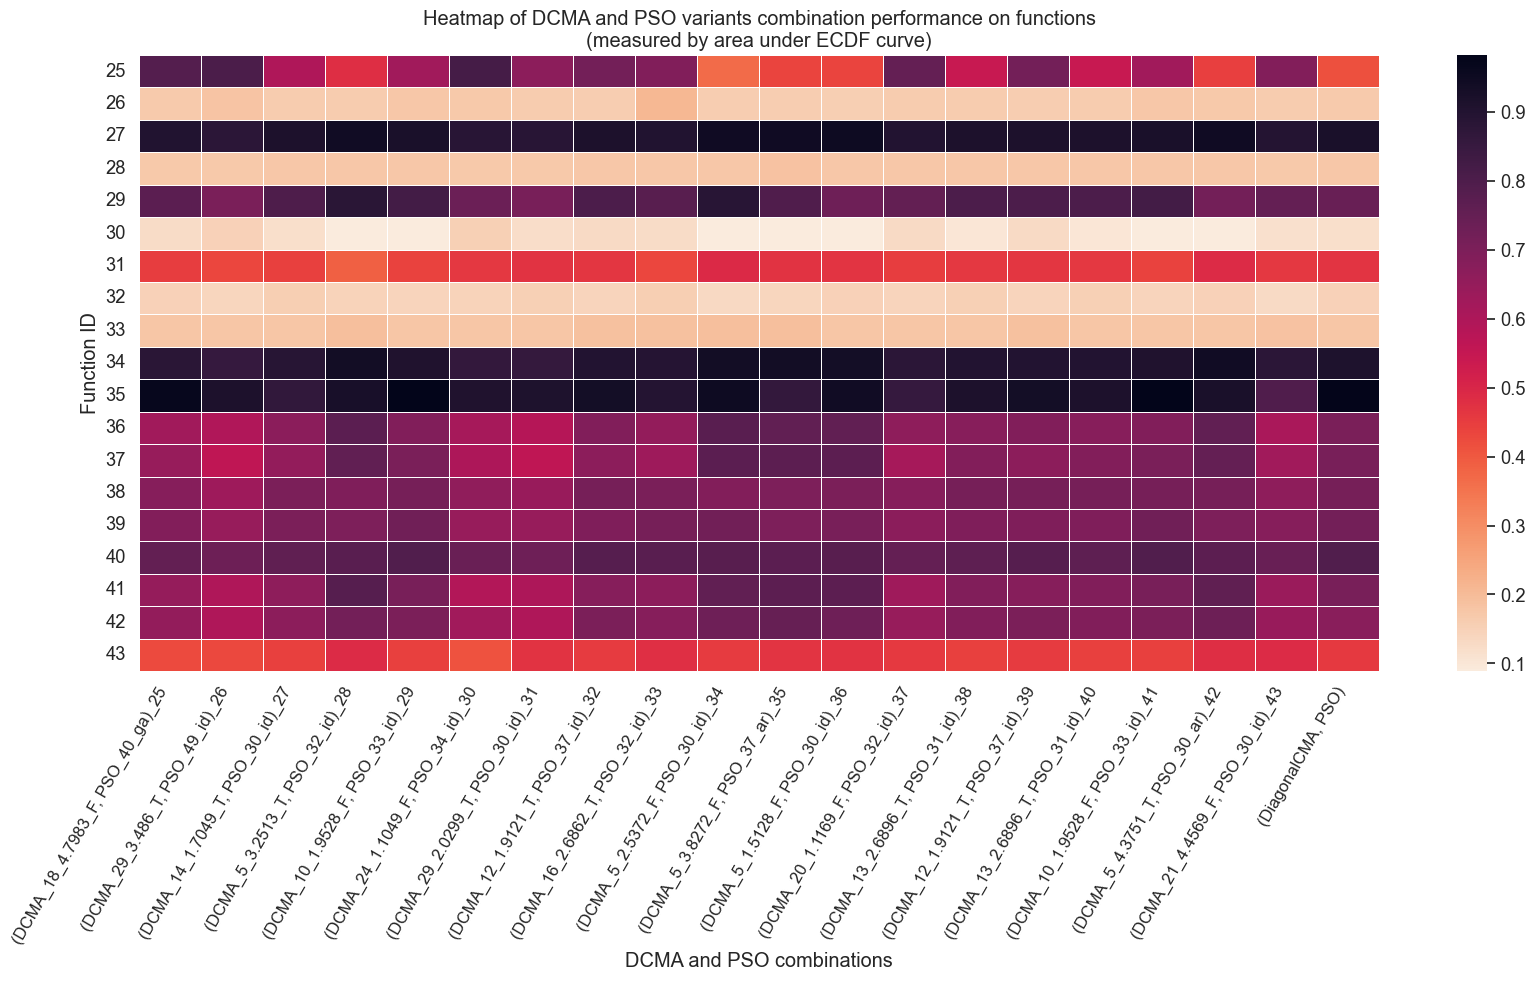

In [36]:
ax = sns.heatmap(df_n1, xticklabels=1, cmap="rocket_r", linewidths=0.5, linecolor='white')
ax.set_xlabel('DCMA and PSO combinations')
ax.set_ylabel('Function ID')
ax.set_title('Heatmap of DCMA and PSO variants combination performance on functions\n(measured by area under ECDF curve)')
sns.set(font_scale=1.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right', fontsize=12)
figure = plt.gcf()  # get current figure
#figure.set_tight_layout(True)
figure.set_size_inches(20,8)
plt.savefig('filepath/hmap_tune_perfn_n1.pdf', bbox_inches='tight')
plt.show()

In [31]:
col_sum = {}
for col in df_n1.columns:
    col_sum[col] = df_n1[col].sum()
col_sum = pd.DataFrame.from_dict(col_sum, orient='index')
col_sum = col_sum.rename(columns={0: "Performance"})
col_sum = col_sum.sort_values(by=['Performance'], ascending=True)
col_sum

,Performance
"(DCMA_29_2.0299_T, PSO_30_id)_31",10.121695
"(DCMA_29_3.486_T, PSO_49_id)_26",10.199849
"(DCMA_21_4.4569_F, PSO_30_id)_43",10.326531
"(DCMA_24_1.1049_F, PSO_34_id)_30",10.387933
"(DCMA_20_1.1169_F, PSO_32_id)_37",10.487946
"(DCMA_14_1.7049_T, PSO_30_id)_27",10.563276
"(DCMA_13_2.6896_T, PSO_31_id)_40",10.675805
"(DCMA_13_2.6896_T, PSO_31_id)_38",10.675805
"(DCMA_18_4.7983_F, PSO_40_ga)_25",10.678231
"(DiagonalCMA, PSO)",10.705271


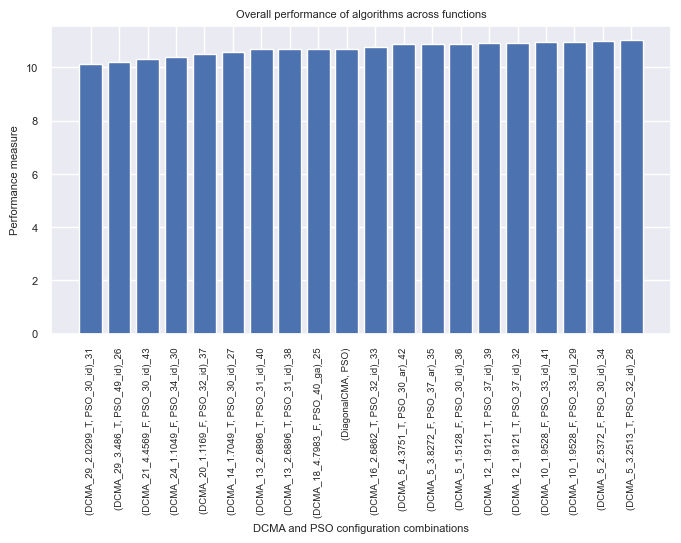

In [37]:
x3 = list(np.arange(20))
col_sum = col_sum.reset_index()
plt.bar(x3, col_sum['Performance'])
plt.xlabel('DCMA and PSO configuration combinations', fontsize=8)
plt.ylabel('Performance measure', fontsize=8)
plt.title('Overall performance of algorithms across functions', fontsize=8)
plt.xticks(x3, col_sum['index'], rotation=90, fontsize=7)
plt.yticks(fontsize=8)
figure = plt.gcf()  # get current figure
#figure.set_tight_layout(True)
figure.set_size_inches(8,4)
plt.savefig(r'ioh_logs_tune/new_algo2/ranking_tune_perfn.pdf', bbox_inches='tight')
plt.show()

In [33]:
df_n2 = df_final.copy()

In [34]:
for col in df_n2.columns:
    for f in functions:
        df_n2.loc[f][col] = df_n2.loc[f][col]/df_n2.loc[f]['(DiagonalCMA, PSO)']        

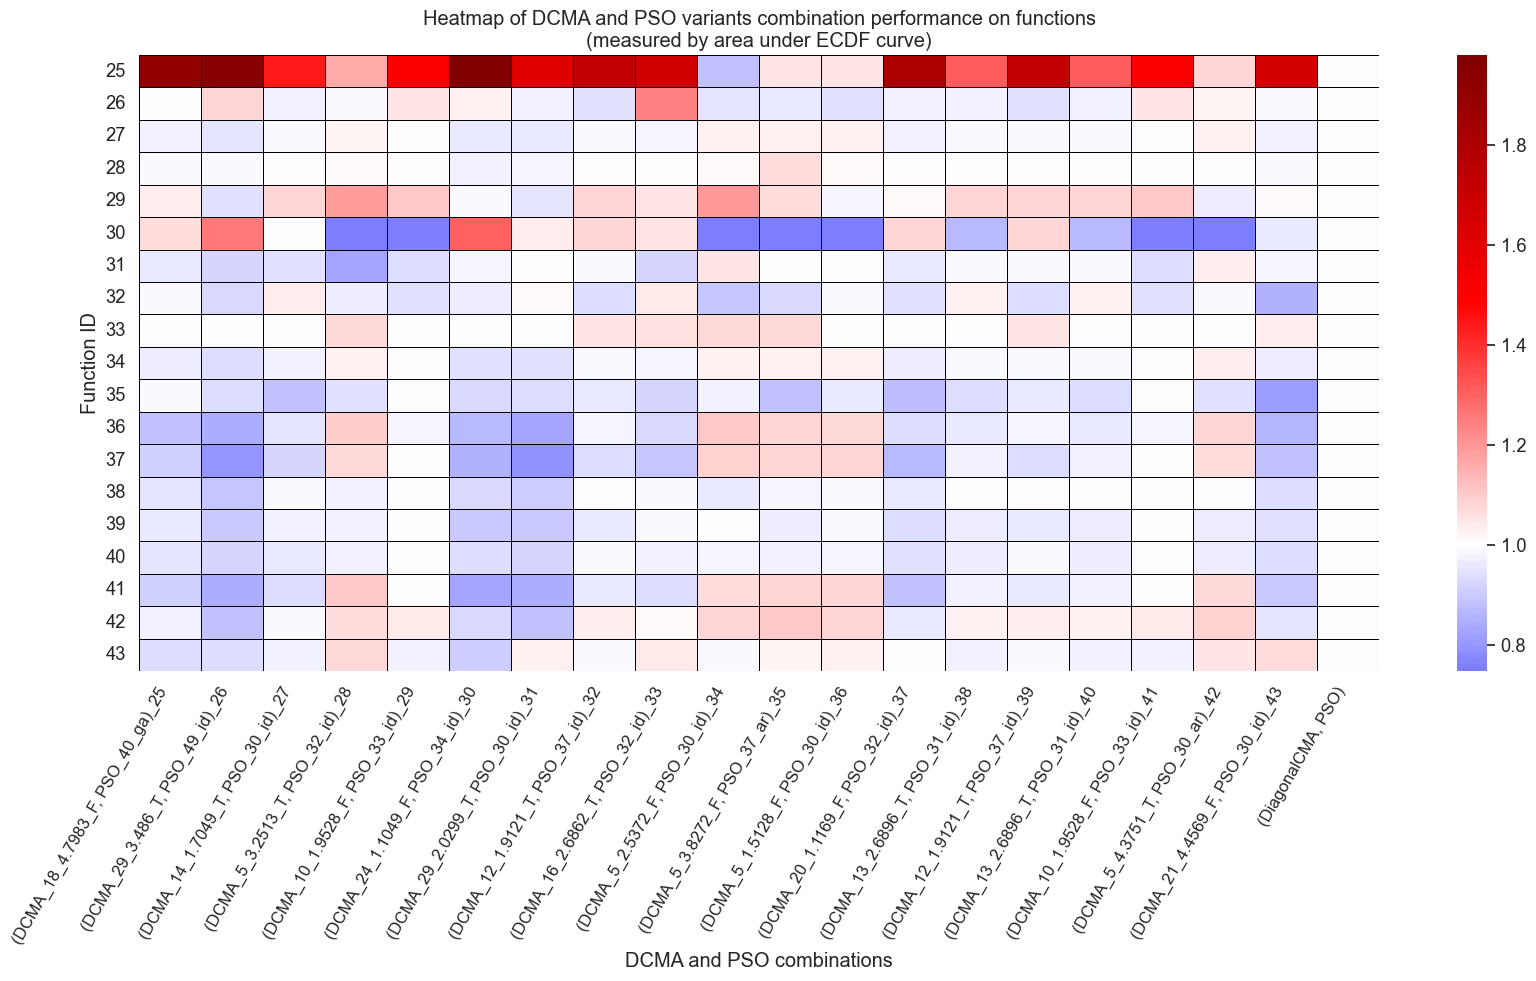

In [38]:
ax = sns.heatmap(df_n2, xticklabels=1, cmap="seismic", center=1.0, linewidths=0.5, linecolor='black')
ax.set_xlabel('DCMA and PSO combinations')
ax.set_ylabel('Function ID')
ax.set_title('Heatmap of DCMA and PSO variants combination performance on functions\n(measured by area under ECDF curve)')
sns.set(font_scale=1.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right', fontsize=12)
figure = plt.gcf()  # get current figure
#figure.set_tight_layout(True)

figure.set_size_inches(20,8)
plt.savefig('ioh_logs_tune/new_algo2/hmap_tune_perfn_n2.pdf', bbox_inches='tight')
plt.show()